# Analise de Acidentes

    Copyright (C) 2019 - Luis Vitório
    Analise de Acidentes de Trânsito

    Este programa é um software livre: você pode redistribuí-lo e/ou
    modificá-lo sob os termos da Licença Pública Geral Affero GNU,
    conforme publicado pela Free Software Foundation, seja a versão 3
    da Licença ou (a seu critério) qualquer versão posterior.

    Este programa é distribuído na esperança de que seja útil,
    mas SEM QUALQUER GARANTIA; sem a garantia implícita de
    COMERCIALIZAÇÃO OU ADEQUAÇÃO A UM DETERMINADO PROPÓSITO. Veja a
    Licença Pública Geral Affero GNU para obter mais detalhes.

    Você deve ter recebido uma cópia da Licença Pública Geral Affero GNU
    junto com este programa. Se não, veja <https://www.gnu.org/licenses/>.

    linkedin: https://www.linkedin.com/in/vitorioluis/
    email: vitorioluis@gmail.com

#### Dados obtidos de 

#### Ferramentas utilizadas para realizar o Data Analytics
<img src="./img/1.png" >

In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline

## Fase 1
#### Importar e tratar os dados

In [2]:
# arquivo por formato
def filtrar_arquivo(tipo):
    path = './'
    lst_arq = os.listdir(path) # listando novamente o diretório para verificar arquivos csv
    return [arq for arq in lst_arq if arq[-3:] == tipo]

# Separa arquivo zip caso haja outros tipos de arquivo na pasta
lst_zip = filtrar_arquivo('zip')

# extrair arquivos do zip para trabalhar
for zp in lst_zip:
    fzp = zipfile.ZipFile(zp)
    fzp.extractall('./') 
    fzp.close()

# Separa arquivo csv caso haja outros tipos de arquivo no diretório
lst_csv = filtrar_arquivo('csv')

# criar dataframe vazio para unir as bases
df_acidentes = pd.DataFrame()

# É hora de ler os arquivos csv e consolidar no dataframe
for csv in lst_csv:
    df = pd.read_csv(csv, sep=';', encoding='latin1')
    df_acidentes = df.append(df)
    os.remove(csv)

In [3]:
# verificar se está tudo ok
df_acidentes.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,99973.0,216524.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE ...,Sim,...,Feminino,0,0,1,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ
1,99973.0,216530.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE ...,Sim,...,Masculino,0,0,1,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ
2,99973.0,216523.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE ...,Sim,...,Masculino,0,0,1,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ
3,99973.0,216527.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE ...,Sim,...,Feminino,0,0,1,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ
4,99973.0,216532.0,2018-01-01,segunda-feira,00:20:00,RJ,116.0,"303,5",RESENDE ...,Sim,...,Masculino,1,0,0,0,-22.46937,-44.44705,SR-RJ,DEL5/7,UOP03/RJ


In [4]:
# quantidades de linhas e colunas
df_acidentes.shape

(270912, 37)

##### Nosso conjunto de dados contém 270.912 linhas divididas em 37 colunas

In [5]:
# nome das colunas
df_acidentes.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [6]:
# informações sobre tipos de campos, e dados faltantes
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270912 entries, 0 to 135455
Data columns (total 37 columns):
id                        270912 non-null float64
pesid                     270910 non-null float64
data_inversa              270912 non-null object
dia_semana                270912 non-null object
horario                   270912 non-null object
uf                        270912 non-null object
br                        270528 non-null float64
km                        270528 non-null object
municipio                 270912 non-null object
causa_principal           270912 non-null object
causa_acidente            270912 non-null object
ordem_tipo_acidente       270906 non-null float64
tipo_acidente             270912 non-null object
classificacao_acidente    270912 non-null object
fase_dia                  270912 non-null object
sentido_via               270912 non-null object
condicao_metereologica    270912 non-null object
tipo_pista                270912 non-null object
tra

In [27]:
df_acidentes.tail()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
135451,172205.0,377671.0,2018-10-20,sábado,15:46:00,PR,476,133.0,CURITIBA ...,Sim,...,Não Informado,0,0,0,0,-25.469219,-49.254143,SR-PR,DEL7/1,UOP06/PR
135452,172205.0,377678.0,2018-10-20,sábado,15:46:00,PR,476,133.0,CURITIBA ...,Sim,...,Masculino,0,1,0,0,-25.469219,-49.254143,SR-PR,DEL7/1,UOP06/PR
135453,172310.0,377838.0,2018-07-27,sexta-feira,14:00:00,SE,235,51.0,ITABAIANA ...,Sim,...,Masculino,1,0,0,0,-10.700226,-37.431423,SR-SE,DEL20/1,UOP02/SE
135454,172310.0,377839.0,2018-07-27,sexta-feira,14:00:00,SE,235,51.0,ITABAIANA ...,Sim,...,Feminino,0,1,0,0,-10.700226,-37.431423,SR-SE,DEL20/1,UOP02/SE
135455,172439.0,378142.0,2018-05-14,segunda-feira,23:00:00,BA,101,661.2,ITAPEBI ...,Sim,...,Masculino,0,1,0,0,-15.939872,-39.559708,SR-BA,DEL10/5,UOP02/BA


In [7]:
# plot de calor adaptado para verificar dados faltantes em amarelo
def grafico_dados_faltantes():
    plt.figure(figsize=(15,10))
    return sns.heatmap(df_acidentes.isnull(), yticklabels=False, cbar=False, cmap='viridis');

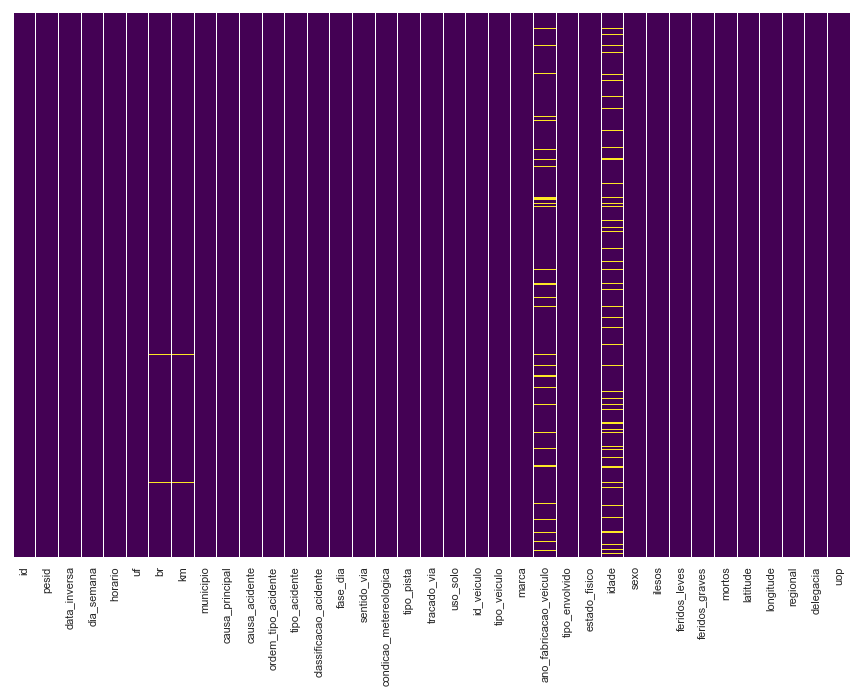

In [8]:
grafico_dados_faltantes();

##### No gráfico acima podemos observar os dados faltantes em amarelo, apenas 4 colunas contém dados faltantes:
#####   * "br" => Nome da rodovia
#####   * "km" => kilômetro onde aconteceu o acident 
#####   * "idade" => idade do contutor do veículo
#####   * "ano_fabricacao_veiculo" => como o próprio nome ja diz ano de fabricação do veículo

In [9]:
# Aplica a média de idade para preencher os dados faltandes da coluna "idade"
df_acidentes['idade'].fillna((df_acidentes['idade'].mean(skipna=True)),inplace=True)

# gerar a média do ano de fabricação
ano_medio_fabricacao = int(df_acidentes['ano_fabricacao_veiculo'].mean())

# tratando o ano médio de fabricação do veículo
df_acidentes['ano_fabricacao_veiculo'].fillna((ano_medio_fabricacao), inplace=True);

# tratando o campo 'br' que não estão preenchidas
# subistitui o Nulo por Zero(0)
df_acidentes['br'] = df_acidentes['br'].fillna(0) 

# converte em inteiro para remover casa decimal
df_acidentes['br'] = df_acidentes['br'].astype(int)

# converte em str
df_acidentes['br'] = df_acidentes['br'].astype(str) 

# preenche os campos de valores Zero(0) 
df_acidentes.loc[df_acidentes['br'] == '0','br'] = 'Nome da BR não preenchido' 

# normalizando dados(coluna br com o tamanho de 3 caracteres)
df_acidentes['br'] = df_acidentes['br'].apply(lambda n: '0' * (3 - len(n)) + n if len(n) < 3 else n); 

# converte em str e substitui ',' por '.' para em seguida converter em float
df_acidentes['km']=df_acidentes['km'].apply(lambda x: str(x).replace(".","").replace(",","."))

# converte em float
df_acidentes['km'] = df_acidentes['km'].astype(float)

# aplica a média do km nos campos vazios
df_acidentes['km'].fillna((df_acidentes['km'].mean(skipna=True)),inplace=True)

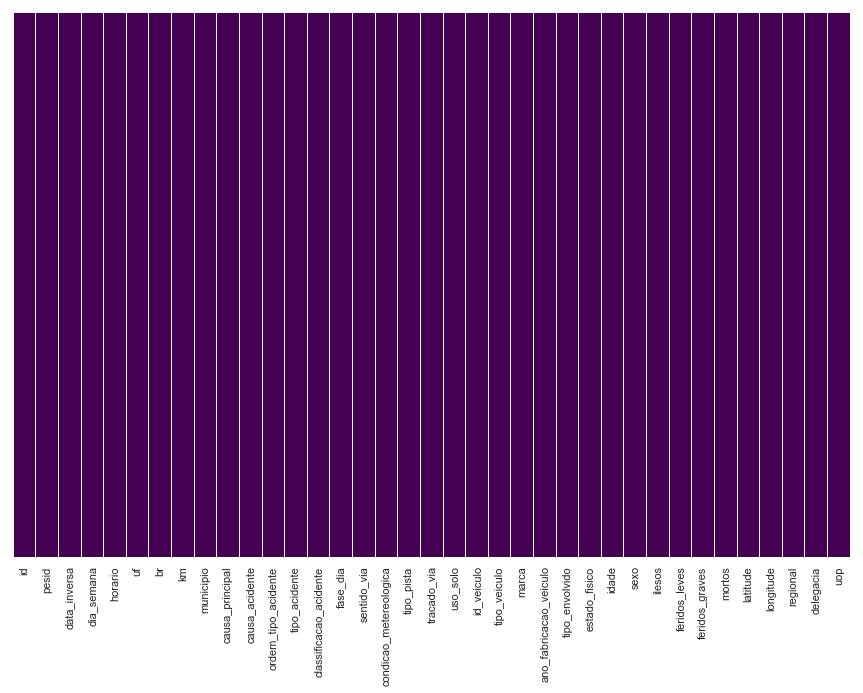

In [10]:
grafico_dados_faltantes();

#### Agora que normalizamos nossos dados e não temos dados faltantes como podemos observar no gráfico, seguiremos para próxima fase.

## Fase 2

### Conhecer/Explorar os dados

##### Para não precisar toda hora ficar digitando a mesma coisa em graficos uma função básica para gerar gráfico 

In [11]:
# total de linha que contém no dataframe
ncount = len(df_acidentes)

In [12]:
# função para gerar gráfico padrão
def gerar_grafico_padrao(campo, largura=10, altura=14, df = df_acidentes,titulo='Acidentes'):
    
    ax = df[campo].value_counts().plot(kind='barh', figsize=(largura, altura), fontsize=13, );
    ax.set_alpha(0.8)
    ax.set_xlabel('Números de Acidentes')
    ax.set_title(titulo)
    ax.set_xticks(np.arange(0, 110, 10)*len(df)/100)
    totals = []

    # encontrar os valores e acrescentar à lista
    for i in ax.patches:
        totals.append(i.get_width())
    
    # definir barras individuais usando a lista acima
    total = sum(totals)

    # definir barras individuais usando a lista acima
    for i in ax.patches:
        ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=12, color='dimgrey')

    # invertido para maior no topo
    ax.invert_yaxis()

    return ax
    

##### Nesta etapa da nossa analise vamos conhecer bem que temos em nossa base de dados, vamos gerar uma série de gráficos buscando por insights.

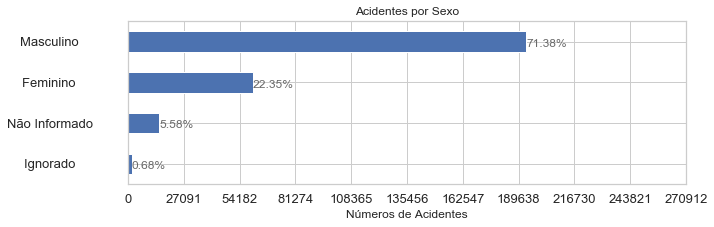

In [13]:
# acidentes por sexo
gerar_grafico_padrao('sexo', altura=3, titulo="Acidentes por Sexo");

##### Tem imagens que 'fala' mais que mil palavras, esse gráfico é um dessas imagem. Os acidentes ocorrido com homens ao volante é mais de 3 vezes maior que os com mulheres ao volante.

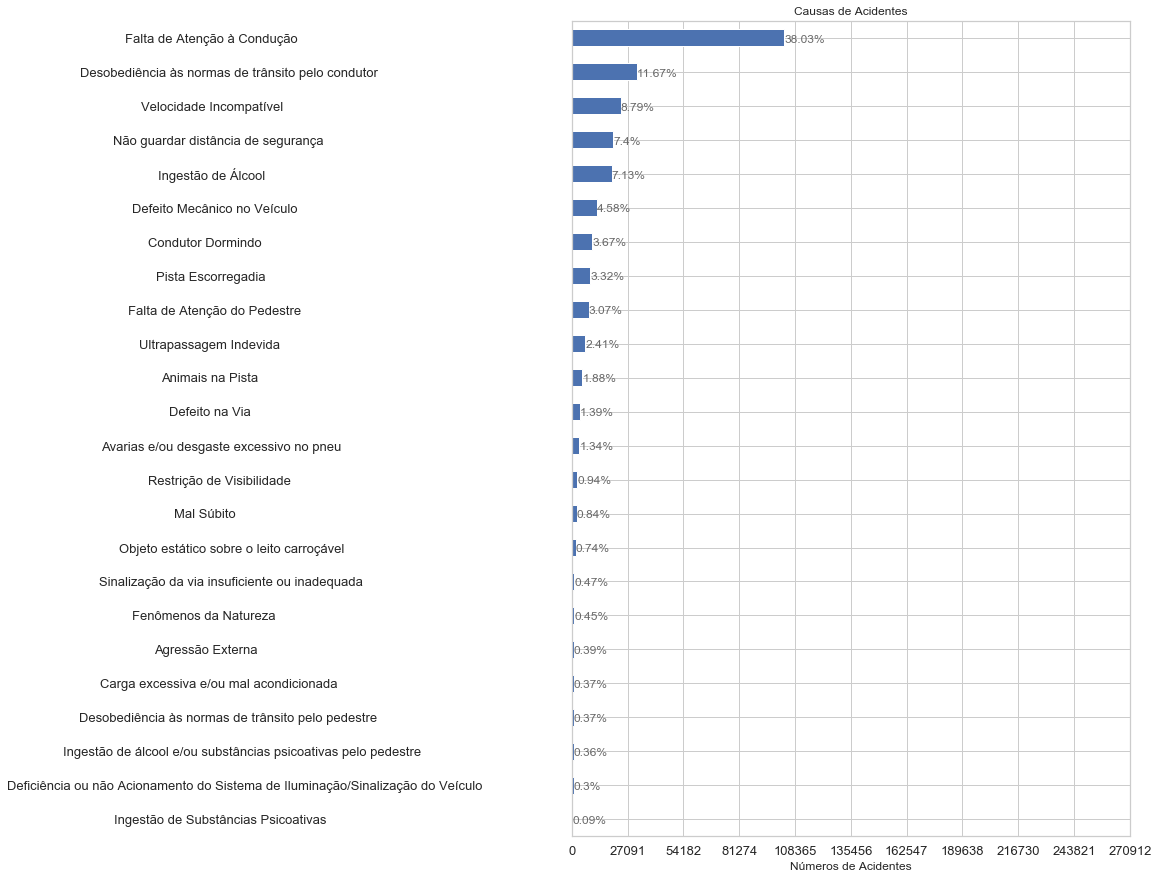

In [14]:
# Gráfico por causa de acidentes.
gerar_grafico_padrao('causa_acidente', altura = 15, largura=10, titulo='Causas de Acidentes');

##### Neste gráfico a categoria "Falta de atenção à condução" é esmagadora estou até surpreso com tamanha desproporção.

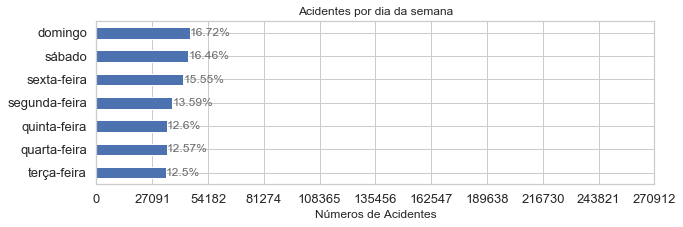

In [15]:
gerar_grafico_padrao('dia_semana', altura=3, largura=10, titulo='Acidentes por dia da semana');

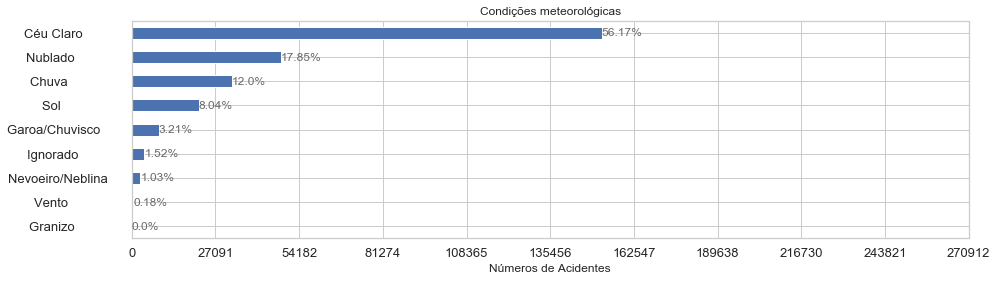

In [16]:
gerar_grafico_padrao('condicao_metereologica', altura=4, largura=15, titulo='Condições meteorológicas');

#### Este gráfico acima para mim é uma surpresa, em condições normais o número de acidentes é muito maior do que em condições adiversas.

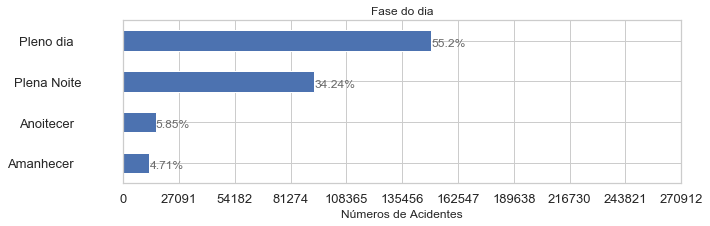

In [17]:
gerar_grafico_padrao('fase_dia', altura = 3, titulo= 'Fase do dia');

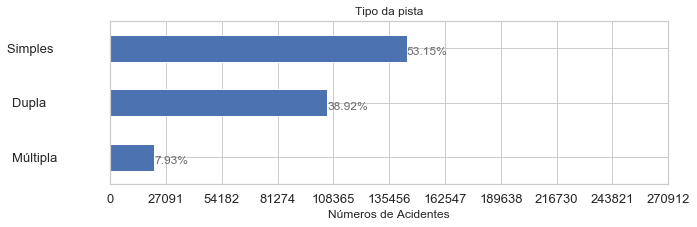

In [19]:
gerar_grafico_padrao('tipo_pista', altura = 3, titulo = 'Tipo da pista');

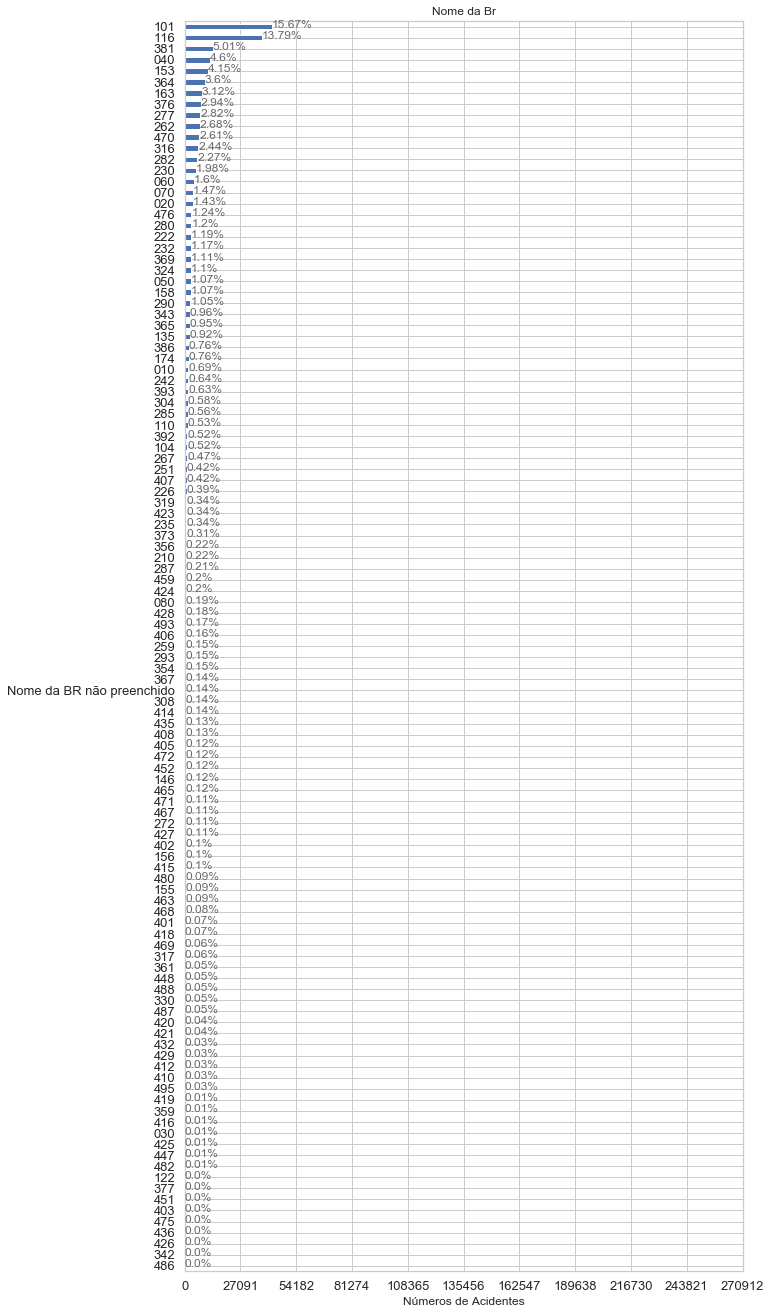

In [20]:
gerar_grafico_padrao('br', largura=10, altura=23, titulo='Nome da Br');

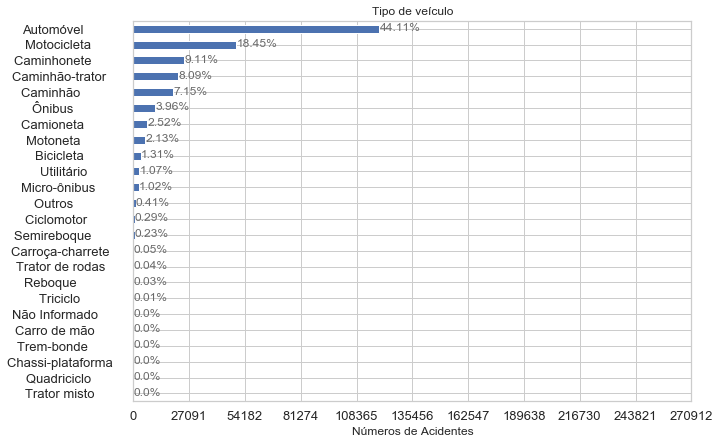

In [21]:
gerar_grafico_padrao('tipo_veiculo', altura=7,titulo='Tipo de veículo');

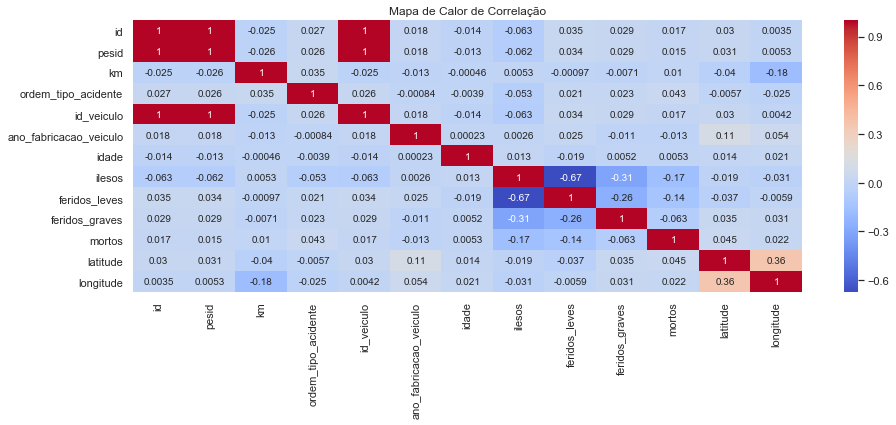

In [22]:
# correlação entre todas as variáveis do nosso dataframe.
plt.figure(figsize=(15,5))
sns.heatmap(df_acidentes.corr(), cmap='coolwarm', annot=True)
plt.title('Mapa de Calor de Correlação');

In [23]:
# Depos de tentar filtar por tipo_veiculo varias vezes não conseguir resultado me ocorreu de verificar 
# como estava os dados e para minha surpresa continha espaço no final 
df_acidentes.tipo_veiculo.unique()

array(['Automóvel           ', 'Motocicleta         ',
       'Caminhonete         ', 'Camioneta           ',
       'Ônibus              ', 'Bicicleta           ',
       'Motoneta            ', 'Caminhão            ',
       'Outros              ', 'Caminhão-trator     ',
       'Semireboque         ', 'Ciclomotor          ',
       'Utilitário          ', 'Carroça-charrete    ',
       'Trator de rodas     ', 'Micro-ônibus        ',
       'Reboque             ', 'Triciclo            ',
       'Carro de mão        ', 'Trem-bonde          ',
       'Trator misto        ', 'Chassi-plataforma   ',
       'Não Informado       ', 'Quadriciclo         '], dtype=object)

In [24]:
# Vamos resolver isso aplicando um strip na coluna
df_acidentes['tipo_veiculo'] = df_acidentes['tipo_veiculo'].apply(lambda x : str(x).strip());
df_acidentes.tipo_veiculo.unique()

array(['Automóvel', 'Motocicleta', 'Caminhonete', 'Camioneta', 'Ônibus',
       'Bicicleta', 'Motoneta', 'Caminhão', 'Outros', 'Caminhão-trator',
       'Semireboque', 'Ciclomotor', 'Utilitário', 'Carroça-charrete',
       'Trator de rodas', 'Micro-ônibus', 'Reboque', 'Triciclo',
       'Carro de mão', 'Trem-bonde', 'Trator misto', 'Chassi-plataforma',
       'Não Informado', 'Quadriciclo'], dtype=object)

In [25]:
# Agora sim vamos separar acidentes ocorrido motocicletas
df_motos = df_acidentes.loc[df_acidentes.tipo_veiculo == 'Motocicleta']
df_motos.shape

(49976, 37)

In [29]:
df_motos.tail()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
135440,171992.0,377074.0,2018-10-11,quinta-feira,20:30:00,RJ,116,181.7,NOVA IGUACU ...,Sim,...,Masculino,0,1,0,0,-22.739447,-43.464832,SR-RJ,DEL5/1,UOP02/RJ
135444,172025.0,377158.0,2018-09-14,sexta-feira,07:00:00,SC,280,79.8,CORUPA ...,Sim,...,Masculino,0,1,0,0,-26.446527,-49.201656,SR-SC,DEL8/6,UOP03/SC
135448,172062.0,377231.0,2018-10-20,sábado,13:00:00,MG,040,632.5,CONSELHEIRO LAFAIETE ...,Sim,...,Masculino,0,0,1,0,-20.681378,-43.794267,SR-MG,DEL4/5,UOP02/MG
135452,172205.0,377678.0,2018-10-20,sábado,15:46:00,PR,476,133.0,CURITIBA ...,Sim,...,Masculino,0,1,0,0,-25.469219,-49.254143,SR-PR,DEL7/1,UOP06/PR
135454,172310.0,377839.0,2018-07-27,sexta-feira,14:00:00,SE,235,51.0,ITABAIANA ...,Sim,...,Feminino,0,1,0,0,-10.700226,-37.431423,SR-SE,DEL20/1,UOP02/SE
